<a href="https://colab.research.google.com/github/sanketkar24/IPL-Match-Prediction/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv("matches.csv")
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
data.isnull().sum()


id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
data = data.iloc[:,:-1]
data.dropna(inplace=True)
print(len(data.index))

743


In [ ]:
data = data[data['team1'] != data['team2']]
print(len(data.index))


743


In [ ]:
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [ ]:
#for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

#For Pune
data['team1']=data['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['team2']=data['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['winner']=data['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

#For Pune
data['team1']=data['team1'].str.replace('Pune Warriors','Rising Pune Supergiant')
data['team2']=data['team2'].str.replace('Pune Warriors','Rising Pune Supergiant')
data['winner']=data['winner'].str.replace('Pune Warriors','Rising Pune Supergiant')

Text(0.5, 1.0, 'IPL  matches won by each team')

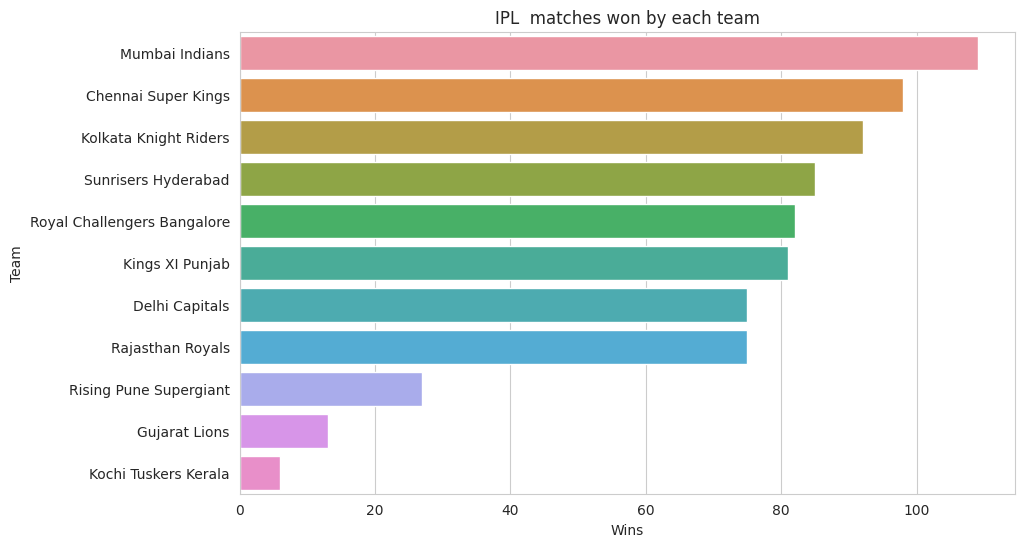

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('IPL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

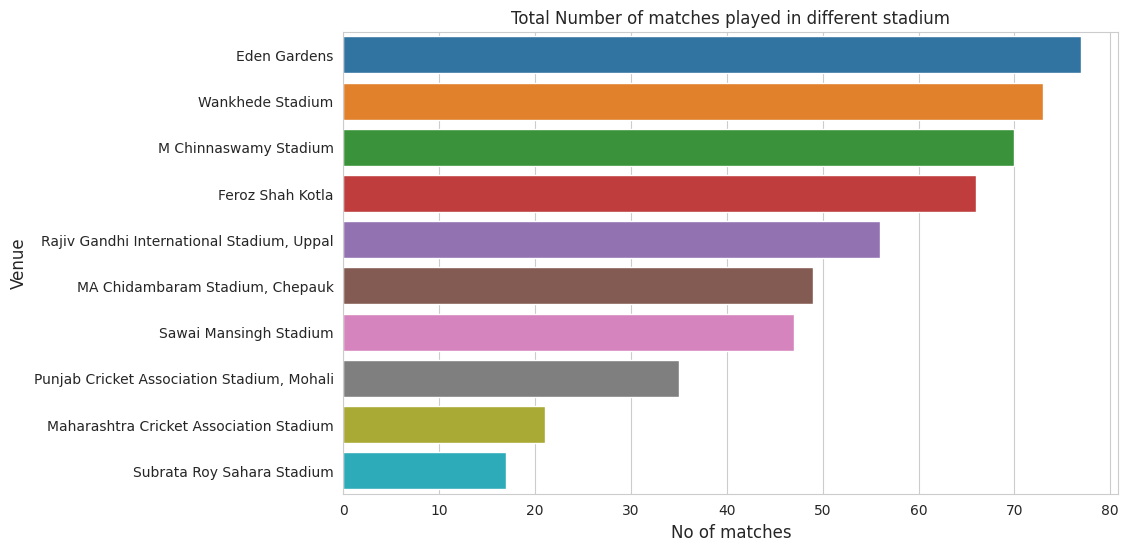

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

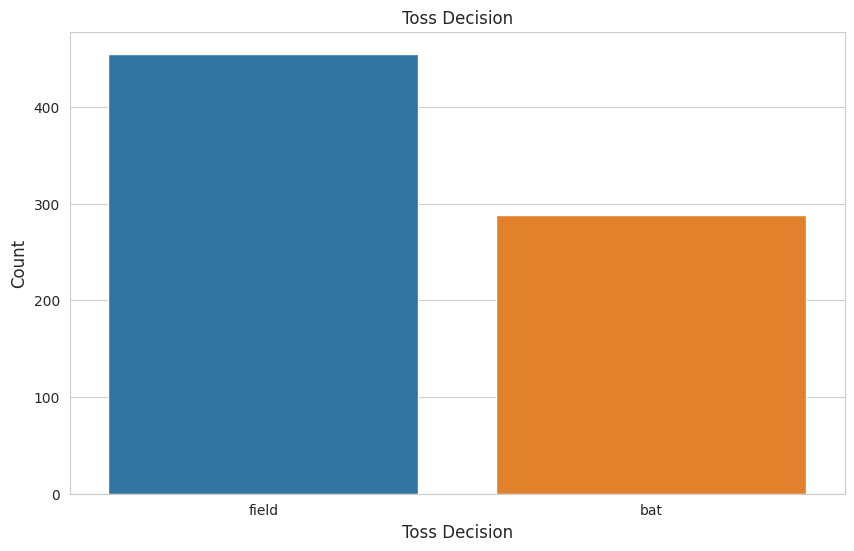

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [ ]:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur      

In [ ]:
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [ ]:
data.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [ ]:
X = data.drop(["winner"], axis=1)
y = data["winner"]

In [ ]:
X

,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,0,9
...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,0,6
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,0,6


In [ ]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

In [ ]:
X.head()

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,team1_Rising Pune Supergiant,team1_Royal Challengers Bangalore,team1_Sunrisers Hyderabad,team2_Delhi Capitals,team2_Gujarat Lions,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Rajasthan Royals,team2_Rising Pune Supergiant,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,toss_winner_Deccan Chargers,toss_winner_Delhi Capitals,toss_winner_Delhi Daredevils,toss_winner_Gujarat Lions,toss_winner_Kings XI Punjab,toss_winner_Kochi Tuskers Kerala,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
0,0,35,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,0,0,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:

y

0         Sunrisers Hyderabad
1      Rising Pune Supergiant
2       Kolkata Knight Riders
3             Kings XI Punjab
5         Sunrisers Hyderabad
                ...          
750           Kings XI Punjab
751            Mumbai Indians
752            Mumbai Indians
754       Chennai Super Kings
755            Mumbai Indians
Name: winner, Length: 743, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# print(le.transform(["Sunrisers Hyderabad","Mumbai Indians", "Mumbai Indians"]))
# og = le.inverse_transform(y)
# print(og)
# print(le.classes_)

In [ ]:
y

array([10,  8,  5,  3, 10,  6,  3,  1,  6,  5,  6,  2,  5,  1,  6,  8,  5,
       10,  9, 10,  6,  2,  6,  8,  3,  5,  8,  5,  2,  5, 10,  8,  6,  3,
       10,  6,  8,  1,  8,  1,  3,  8,  6,  5,  2, 10,  3,  1,  3,  1, 10,
        6,  8,  9,  8,  5,  6,  6,  5,  0,  1,  9,  5,  7,  1,  0,  7,  3,
        7,  0, 10,  3,  0,  6,  1,  3,  7,  1,  9,  3,  6,  7,  3, 10,  6,
        0,  5,  7,  6,  0,  5,  7,  3,  5,  6,  3,  1,  6,  3,  7,  6,  0,
        1,  7,  3,  9,  3,  1,  7,  9,  5,  7,  0,  7,  0,  7,  6,  9,  1,
       10,  0,  5, 10,  1,  7,  3, 10,  1,  3, 10,  6,  7,  9,  3,  1,  0,
        6,  9,  7,  0,  3,  9,  0,  7,  1, 10,  7,  0,  1,  3,  0,  6,  1,
       10,  9,  6,  1,  9,  7,  3,  0, 10,  3,  1,  5,  9,  5,  0,  1,  9,
       10,  9, 10,  5,  6,  1,  5, 10,  1,  9,  0,  6,  9,  0, 10,  7,  9,
       10,  3,  6,  9,  7,  6,  7,  5,  1,  7,  6,  1,  6,  0,  1,  5,  9,
        0,  6,  3,  1,  7,  0,  7,  5, 10,  3, 10,  9,  3,  6, 10,  6,  0,
        9,  1, 10,  6,  5

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [ ]:
y_test

array([ 3,  1,  5,  9,  9, 10,  6,  5,  6,  9,  9,  9,  6,  0,  7,  5,  2,
        7,  0,  3,  6,  5,  9,  9,  0,  0,  6,  6,  9,  2,  7,  9,  6,  6,
        9,  9,  7,  3, 10,  7,  0, 10,  8,  3,  6,  6,  5,  0,  0,  5, 10,
        3,  3,  5,  6, 10,  1,  5, 10,  0,  0,  5,  6,  7,  7,  6,  0,  9,
        1,  0,  1,  5,  5,  7,  0,  6,  7,  3,  1,  0,  1,  7,  0,  5,  9,
        8,  6,  3,  1,  9,  9, 10,  2,  5, 10,  9,  7,  7, 10,  1,  9,  9,
        9,  1,  9,  1, 10,  0,  1,  0,  0,  0,  3,  1,  0, 10,  1,  9,  3,
       10,  7,  7,  5,  9,  5,  3,  6,  7,  1,  9,  0,  0,  7,  9,  9,  3,
        6,  6,  1, 10, 10,  5,  6,  1,  7,  9,  6,  3,  0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = 'sqrt')

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
x_test

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,team1_Rising Pune Supergiant,team1_Royal Challengers Bangalore,team1_Sunrisers Hyderabad,team2_Delhi Capitals,team2_Gujarat Lions,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Rajasthan Royals,team2_Rising Pune Supergiant,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad,toss_winner_Deccan Chargers,toss_winner_Delhi Capitals,toss_winner_Delhi Daredevils,toss_winner_Gujarat Lions,toss_winner_Kings XI Punjab,toss_winner_Kochi Tuskers Kerala,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
727,0,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
103,0,0,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
63,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
683,0,0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
619,0,144,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,45,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
654,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
156,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
105,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         3
           3       0.92      0.92      0.92        13
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        17
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        14

    accuracy                           0.97       149
   macro avg       0.98      0.93      0.95       149
weighted avg       0.97      0.97      0.97       149

Confusion Matrix
Accuracy: 0.9731543624161074


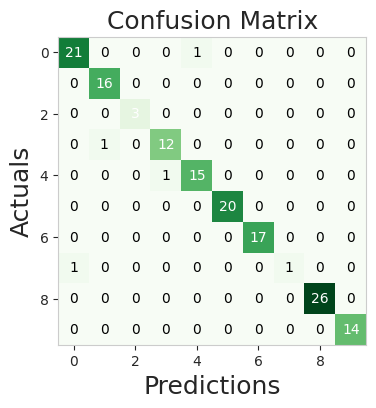

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(x_test)
print('Classification Report')
print(classification_report(y_test, y_pred, zero_division=0))
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)
print('Accuracy:', ac)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

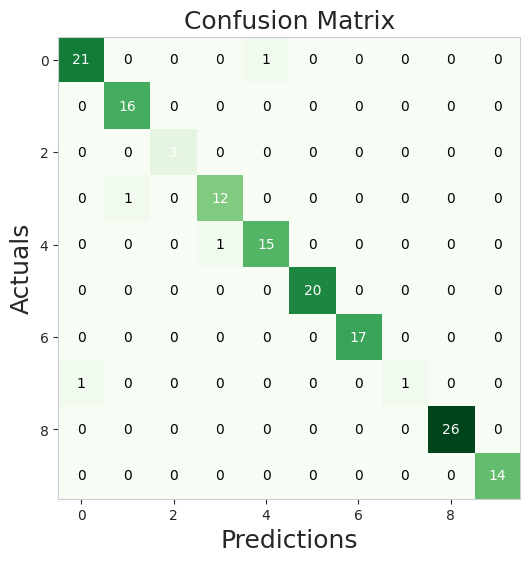

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
y_test

array([ 3,  1,  5,  9,  9, 10,  6,  5,  6,  9,  9,  9,  6,  0,  7,  5,  2,
        7,  0,  3,  6,  5,  9,  9,  0,  0,  6,  6,  9,  2,  7,  9,  6,  6,
        9,  9,  7,  3, 10,  7,  0, 10,  8,  3,  6,  6,  5,  0,  0,  5, 10,
        3,  3,  5,  6, 10,  1,  5, 10,  0,  0,  5,  6,  7,  7,  6,  0,  9,
        1,  0,  1,  5,  5,  7,  0,  6,  7,  3,  1,  0,  1,  7,  0,  5,  9,
        8,  6,  3,  1,  9,  9, 10,  2,  5, 10,  9,  7,  7, 10,  1,  9,  9,
        9,  1,  9,  1, 10,  0,  1,  0,  0,  0,  3,  1,  0, 10,  1,  9,  3,
       10,  7,  7,  5,  9,  5,  3,  6,  7,  1,  9,  0,  0,  7,  9,  9,  3,
        6,  6,  1, 10, 10,  5,  6,  1,  7,  9,  6,  3,  0])

In [ ]:
y_pred

array([ 3,  1,  5,  9,  9, 10,  6,  5,  6,  9,  9,  9,  6,  0,  7,  5,  2,
        7,  0,  3,  6,  5,  9,  9,  0,  0,  6,  6,  9,  2,  7,  9,  6,  6,
        9,  9,  7,  3, 10,  7,  0, 10,  0,  3,  6,  6,  3,  5,  0,  5, 10,
        3,  3,  5,  6, 10,  1,  5, 10,  0,  0,  5,  6,  7,  7,  6,  0,  9,
        1,  0,  1,  5,  5,  7,  0,  6,  7,  3,  1,  0,  1,  7,  0,  5,  9,
        8,  6,  1,  1,  9,  9, 10,  2,  5, 10,  9,  7,  7, 10,  1,  9,  9,
        9,  1,  9,  1, 10,  0,  1,  0,  0,  0,  3,  1,  0, 10,  1,  9,  3,
       10,  7,  7,  5,  9,  5,  3,  6,  7,  1,  9,  0,  0,  7,  9,  9,  3,
        6,  6,  1, 10, 10,  5,  6,  1,  7,  9,  6,  3,  0])

In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

In [ ]:
ac

0.9731543624161074

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=3000)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_pred1)

              precision    recall  f1-score   support

           0       0.80      0.55      0.65        22
           1       0.52      0.75      0.62        16
           2       1.00      1.00      1.00         3
           3       0.56      0.38      0.45        13
           5       0.74      0.88      0.80        16
           6       0.55      0.60      0.57        20
           7       0.67      0.82      0.74        17
           8       0.50      0.50      0.50         2
           9       0.74      0.54      0.62        26
          10       0.56      0.64      0.60        14

    accuracy                           0.64       149
   macro avg       0.66      0.67      0.65       149
weighted avg       0.66      0.64      0.64       149



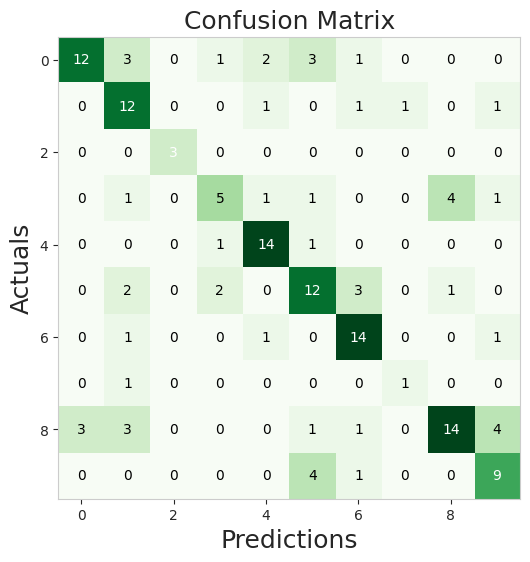

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred1)
print('Accuracy of LR: ',accuracy_LR)

Accuracy of LR:  0.6442953020134228


In [ ]:
print('Actual Data')
print(y_test)
print('Model 1 Data')
print(y_pred)
print('Model 2 Data')
print(y_pred1)

Actual Data
[ 3  1  5  9  9 10  6  5  6  9  9  9  6  0  7  5  2  7  0  3  6  5  9  9
  0  0  6  6  9  2  7  9  6  6  9  9  7  3 10  7  0 10  8  3  6  6  5  0
  0  5 10  3  3  5  6 10  1  5 10  0  0  5  6  7  7  6  0  9  1  0  1  5
  5  7  0  6  7  3  1  0  1  7  0  5  9  8  6  3  1  9  9 10  2  5 10  9
  7  7 10  1  9  9  9  1  9  1 10  0  1  0  0  0  3  1  0 10  1  9  3 10
  7  7  5  9  5  3  6  7  1  9  0  0  7  9  9  3  6  6  1 10 10  5  6  1
  7  9  6  3  0]
Model 1 Data
[ 3  1  5  9  9 10  6  5  6  9  9  9  6  0  7  5  2  7  0  3  6  5  9  9
  0  0  6  6  9  2  7  9  6  6  9  9  7  3 10  7  0 10  0  3  6  6  3  5
  0  5 10  3  3  5  6 10  1  5 10  0  0  5  6  7  7  6  0  9  1  0  1  5
  5  7  0  6  7  3  1  0  1  7  0  5  9  8  6  1  1  9  9 10  2  5 10  9
  7  7 10  1  9  9  9  1  9  1 10  0  1  0  0  0  3  1  0 10  1  9  3 10
  7  7  5  9  5  3  6  7  1  9  0  0  7  9  9  3  6  6  1 10 10  5  6  1
  7  9  6  3  0]
Model 2 Data
[ 3  1  5  9  0 10  1  5  6  9 10  9  1  0  1  5  2 

In [ ]:

from sklearn.metrics import roc_curve
from matplotlib import pyplot

print(y_pred)
print(y_test)
y_act = y_test
test_df = pd.DataFrame(zip(y_act, y_pred, y_pred1),
                       columns=['Class', 'Model_1', 'Model_2'])


[ 3  1  5  9  9 10  6  5  6  9  9  9  6  0  7  5  2  7  0  3  6  5  9  9
  0  0  6  6  9  2  7  9  6  6  9  9  7  3 10  7  0 10  0  3  6  6  3  5
  0  5 10  3  3  5  6 10  1  5 10  0  0  5  6  7  7  6  0  9  1  0  1  5
  5  7  0  6  7  3  1  0  1  7  0  5  9  8  6  1  1  9  9 10  2  5 10  9
  7  7 10  1  9  9  9  1  9  1 10  0  1  0  0  0  3  1  0 10  1  9  3 10
  7  7  5  9  5  3  6  7  1  9  0  0  7  9  9  3  6  6  1 10 10  5  6  1
  7  9  6  3  0]
[ 3  1  5  9  9 10  6  5  6  9  9  9  6  0  7  5  2  7  0  3  6  5  9  9
  0  0  6  6  9  2  7  9  6  6  9  9  7  3 10  7  0 10  8  3  6  6  5  0
  0  5 10  3  3  5  6 10  1  5 10  0  0  5  6  7  7  6  0  9  1  0  1  5
  5  7  0  6  7  3  1  0  1  7  0  5  9  8  6  3  1  9  9 10  2  5 10  9
  7  7 10  1  9  9  9  1  9  1 10  0  1  0  0  0  3  1  0 10  1  9  3 10
  7  7  5  9  5  3  6  7  1  9  0  0  7  9  9  3  6  6  1 10 10  5  6  1
  7  9  6  3  0]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=20, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [ ]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cols = x_train.columns.tolist()
print(cols)
tree.export_graphviz(clf, out_file= 'match_predictor.dot' , feature_names=cols, class_names=cols, label='all',rounded=True, filled=True)


['dl_applied', 'win_by_runs', 'win_by_wickets', 'team1_Delhi Capitals', 'team1_Gujarat Lions', 'team1_Kings XI Punjab', 'team1_Kochi Tuskers Kerala', 'team1_Kolkata Knight Riders', 'team1_Mumbai Indians', 'team1_Rajasthan Royals', 'team1_Rising Pune Supergiant', 'team1_Royal Challengers Bangalore', 'team1_Sunrisers Hyderabad', 'team2_Delhi Capitals', 'team2_Gujarat Lions', 'team2_Kings XI Punjab', 'team2_Kochi Tuskers Kerala', 'team2_Kolkata Knight Riders', 'team2_Mumbai Indians', 'team2_Rajasthan Royals', 'team2_Rising Pune Supergiant', 'team2_Royal Challengers Bangalore', 'team2_Sunrisers Hyderabad', 'toss_winner_Deccan Chargers', 'toss_winner_Delhi Capitals', 'toss_winner_Delhi Daredevils', 'toss_winner_Gujarat Lions', 'toss_winner_Kings XI Punjab', 'toss_winner_Kochi Tuskers Kerala', 'toss_winner_Kolkata Knight Riders', 'toss_winner_Mumbai Indians', 'toss_winner_Pune Warriors', 'toss_winner_Rajasthan Royals', 'toss_winner_Rising Pune Supergiant', 'toss_winner_Rising Pune Supergiant

In [ ]:
accuracy

0.9261744966442953

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.88      0.88      0.88        16
           2       1.00      1.00      1.00         3
           3       0.92      0.92      0.92        13
           5       0.88      0.88      0.88        16
           6       1.00      0.95      0.97        20
           7       1.00      0.94      0.97        17
           8       0.50      0.50      0.50         2
           9       1.00      0.96      0.98        26
          10       1.00      0.93      0.96        14

    accuracy                           0.93       149
   macro avg       0.90      0.89      0.89       149
weighted avg       0.93      0.93      0.93       149

Confusion Matrix
Accuracy:  0.9261744966442953


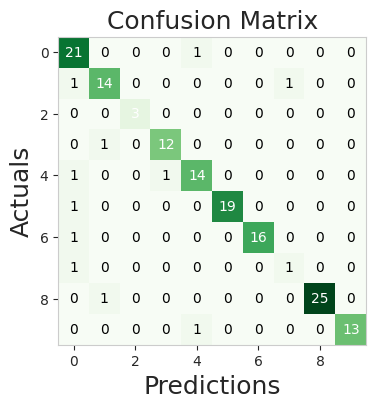

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test, y_pred,zero_division = 0))
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: ',accuracy)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9664429530201343


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test, y_pred,zero_division = 0))
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         3
           3       0.92      0.92      0.92        13
           5       0.94      0.94      0.94        16
           6       0.95      0.95      0.95        20
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00        26
          10       0.93      1.00      0.97        14

    accuracy                           0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149

Confusion Matrix


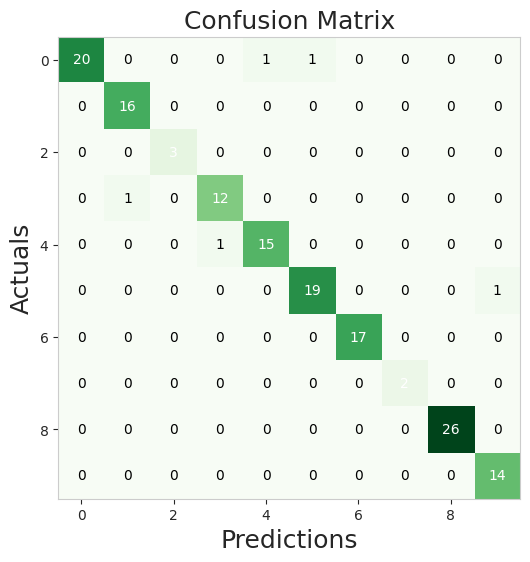

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
import tensorflow as tf
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=40,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=40,activation="relu"))
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))


In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: -8.3940 - accuracy: 0.0875 
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: -26.7978 - accuracy: 0.0993
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: -52.3692 - accuracy: 0.0993
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: -95.7274 - accuracy: 0.0993
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: -171.9443 - accuracy: 0.0993
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: -300.6335 - accuracy: 0.0993
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: -488.8860 - accuracy: 0.0993
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: -757.9208 - accuracy: 0.0993
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: -1149.1932 - accuracy: 0.0993
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: -1690.4069 

In [ ]:
y_pred = ann.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.10738255033557047


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test, y_pred,zero_division = 0))
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.11      1.00      0.19        16
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        14

    accuracy                           0.11       149
   macro avg       0.01      0.10      0.02       149
weighted avg       0.01      0.11      0.02       149

Confusion Matrix
[[ 0 22  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0

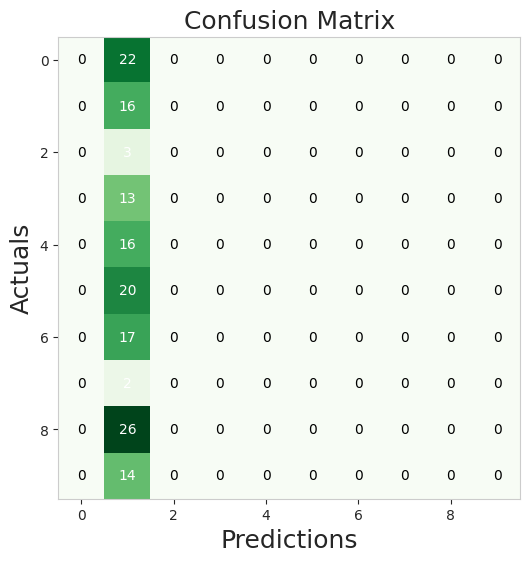

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = xgb_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9664429530201343


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         3
           3       0.92      0.92      0.92        13
           5       0.94      0.94      0.94        16
           6       0.95      0.95      0.95        20
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00        26
          10       0.93      1.00      0.97        14

    accuracy                           0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149

Confusion Matrix
Accuracy:  0.9664429530201343


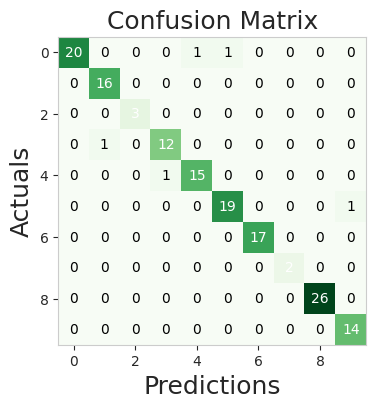

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test, y_pred,zero_division = 0))
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: ',accuracy)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

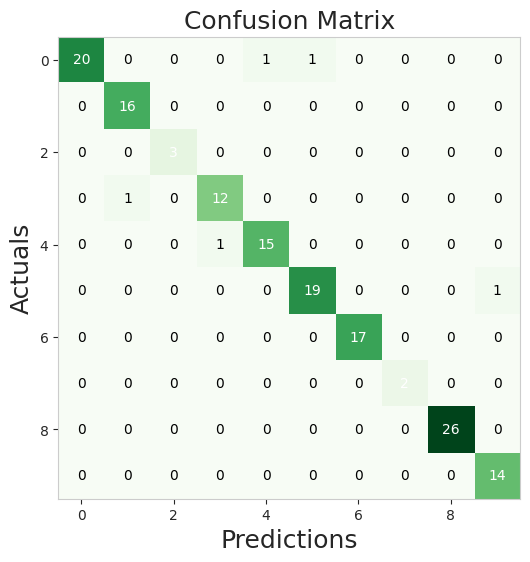

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
K = []
training = []
test = []
scores = {}

for k in range(2, 32):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)

    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.7323232323232324, 0.4899328859060403]
3 : [0.7542087542087542, 0.5302013422818792]
4 : [0.7171717171717171, 0.5234899328859061]
5 : [0.7289562289562289, 0.5637583892617449]
6 : [0.7171717171717171, 0.5302013422818792]
7 : [0.6986531986531986, 0.5369127516778524]
8 : [0.6801346801346801, 0.5369127516778524]
9 : [0.6750841750841751, 0.5704697986577181]
10 : [0.6734006734006734, 0.5637583892617449]
11 : [0.6515151515151515, 0.5973154362416108]
12 : [0.6380471380471381, 0.5906040268456376]
13 : [0.632996632996633, 0.6040268456375839]
14 : [0.6245791245791246, 0.5973154362416108]
15 : [0.6178451178451179, 0.5973154362416108]
16 : [0.6111111111111112, 0.5973154362416108]
17 : [0.601010101010101, 0.5838926174496645]
18 : [0.6094276094276094, 0.5637583892617449]
19 : [0.5909090909090909, 0.5637583892617449]
20 : [0.5925925925925926, 0.5234899328859061]
21 : [0.5791245791245792, 0.5436241610738255]
22 : [0.5723905723905723, 0.5436241610738255]
23 : [0.563973063973064, 0.5436241610738255]

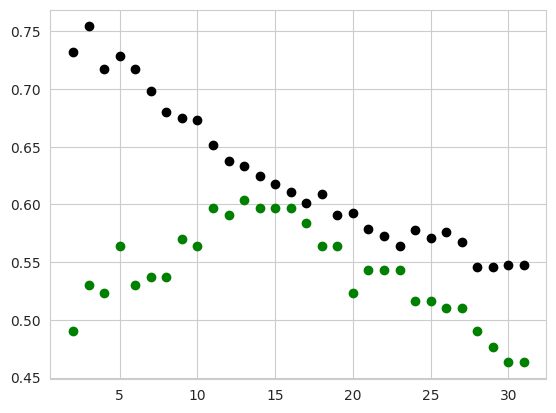

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 19)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5637583892617449


Classification Report
              precision    recall  f1-score   support

           0       0.30      0.64      0.41        22
           1       0.79      0.69      0.73        16
           2       1.00      0.33      0.50         3
           3       0.62      0.62      0.62        13
           5       0.67      0.50      0.57        16
           6       0.57      0.60      0.59        20
           7       0.79      0.65      0.71        17
           8       0.00      0.00      0.00         2
           9       0.92      0.46      0.62        26
          10       0.50      0.50      0.50        14

    accuracy                           0.56       149
   macro avg       0.61      0.50      0.52       149
weighted avg       0.65      0.56      0.58       149

Confusion Matrix
Accuracy:  0.5637583892617449


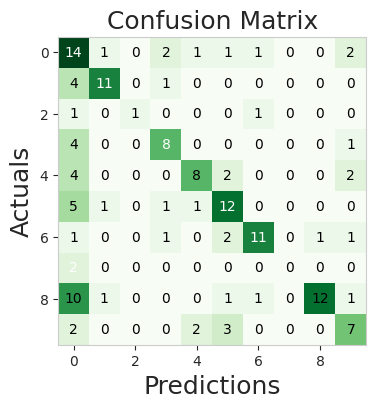

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test, y_pred,zero_division = 0))
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: ',accuracy)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

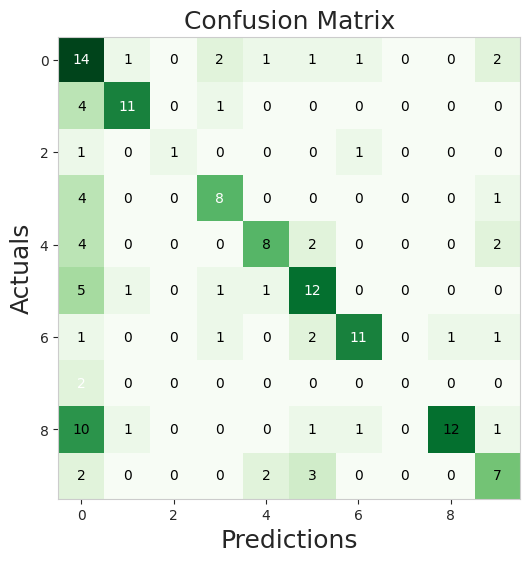

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()